In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.optimize as opt

### Функция счастья


Text(0.5, 0.5, 'параметр 2')

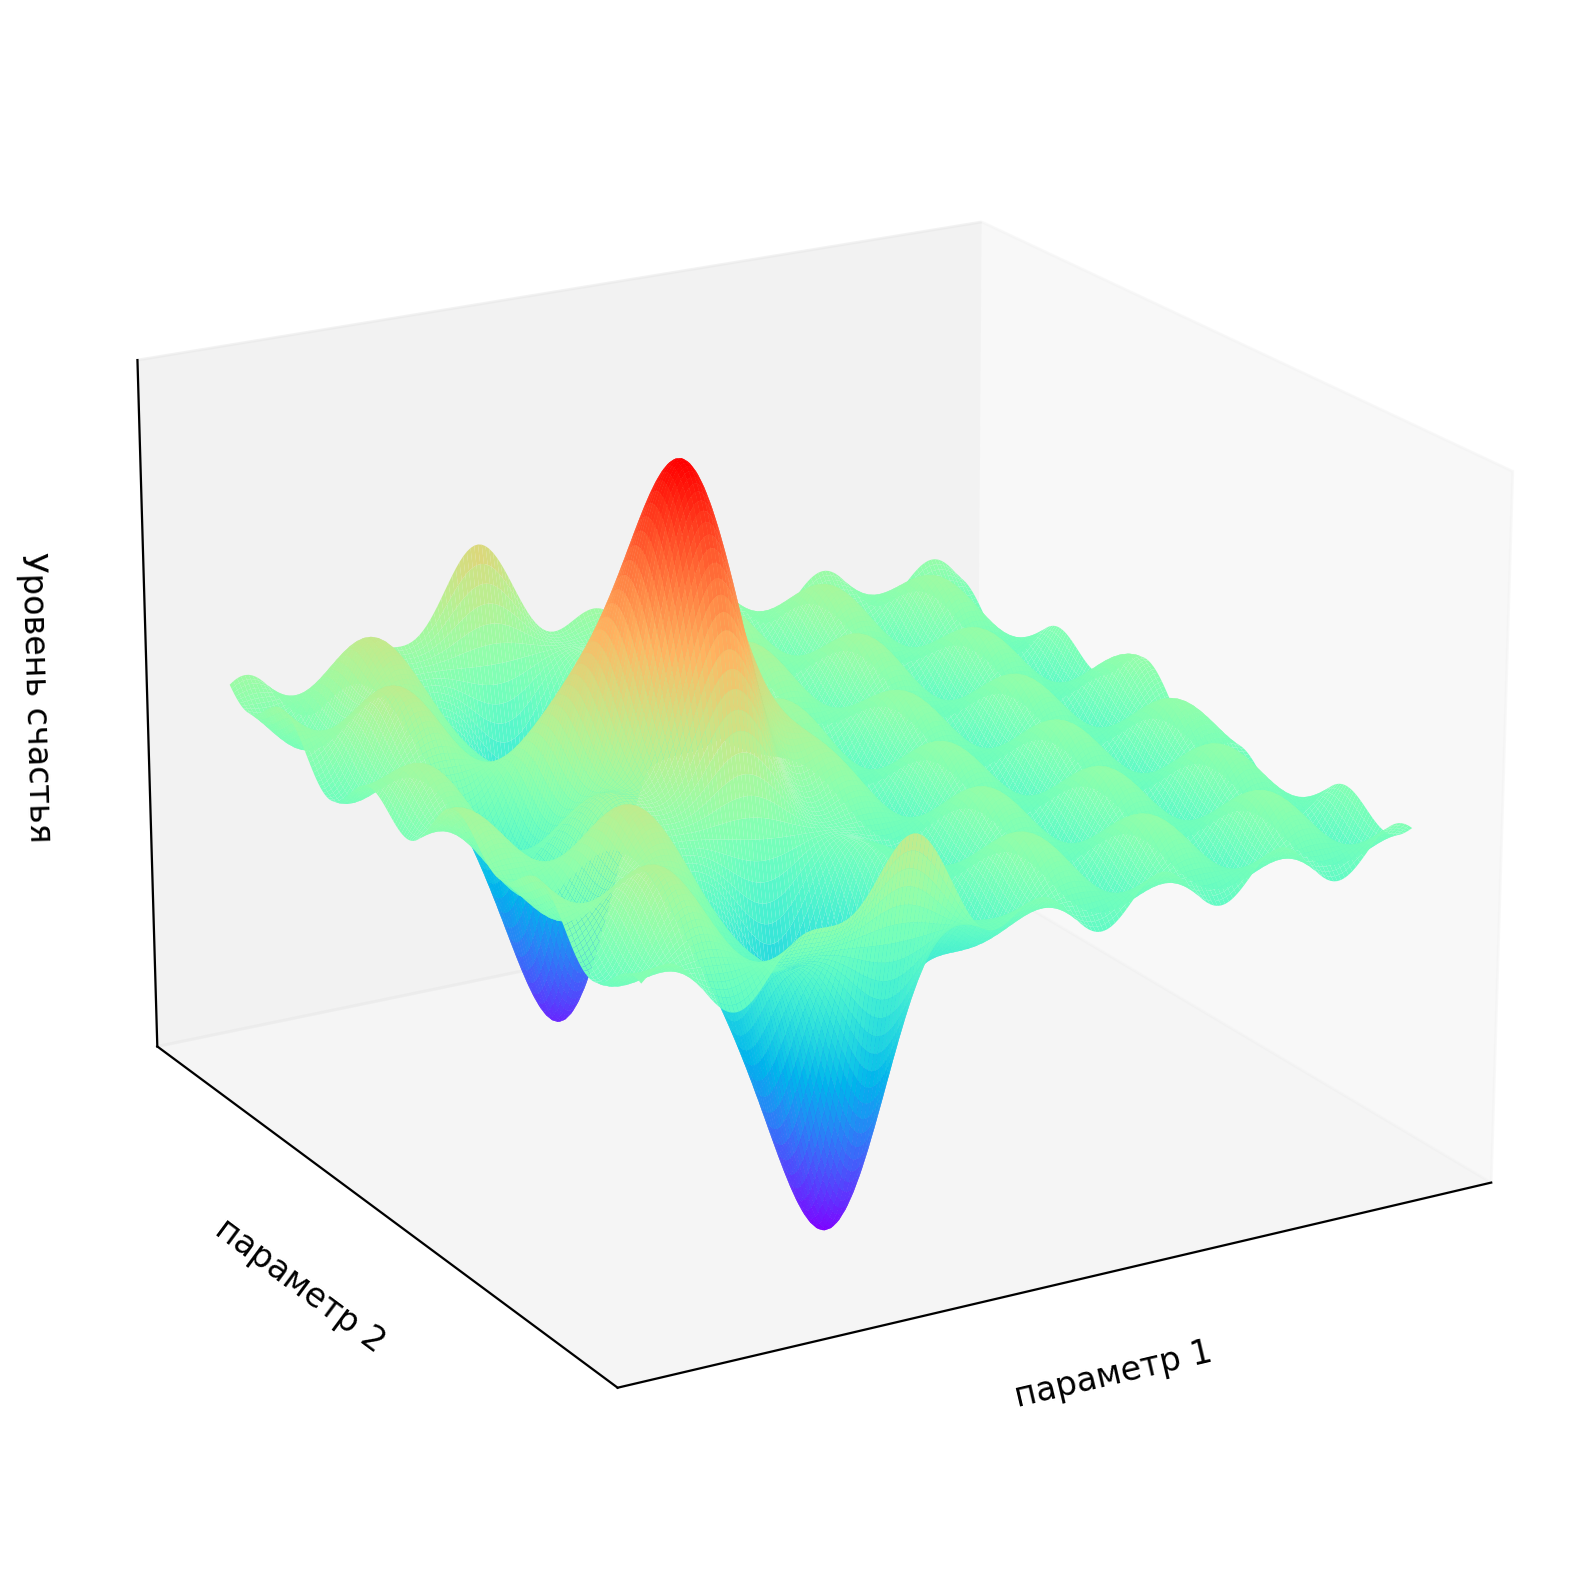

In [2]:
f = lambda x,y: sts.norm.pdf(x - 2) * np.sin(x) * np.cos(y) * 20 + np.arctan(x - y) * 0.3 + np.sin(4 * x + y) *  np.sin(2 * y)
x = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, x)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 10), dpi = 200)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = 20, azim = 60)
# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='rainbow', rcount = 200, ccount = 200)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_zlabel("Уровень счастья", fontsize = 12)
ax.set_xlabel("параметр 1", fontsize = 12)
ax.set_ylabel("параметр 2", fontsize = 12)




### Метод Ньютона

Пусть $f(\vec{x}) \in C^{2}$.

Разложим функцию по формуле Тейлора в окрестности некоторой точки 

$$
f(\vec{x}) = f(\vec{x_0}) + \nabla f(\vec{x_0}) \cdot (\vec{x} - \vec{x_0}) + \frac{1}{2}(\vec{x} - \vec{x_0})^{T} G_{f}(\vec{x_0}) (\vec{x} - \vec{x_0}) + \Epsilon 
$$

$$
\Epsilon  = o(||x - x_{0}||^{3})
$$

$$
F(x) = f(\vec{x_0}) + \nabla f(\vec{x_0}) \cdot (\vec{x} - \vec{x_0}) + \frac{1}{2}(\vec{x} - \vec{x_0})^{T} G_{f}(\vec{x_0}) (\vec{x} - \vec{x_0})
$$

$$
s = x - x_0
$$
$$
F(s) = f(\vec{x_0}) + \nabla f(\vec{x_0}) \cdot s + \frac{1}{2}s^{T} G_{f}(\vec{x_0}) s
$$

$$
\nabla F(s) = 0 + \nabla f(\vec{x_0}) + \frac{1}{2} (G_{f}(\vec{x_0}) s + s^T G_{f}) = \nabla f(\vec{x_0}) + G_f s = 0
$$

$$
s = -G_f^{-1}\nabla f(x_0) 
$$

$$
x = x_0  - G_f^{-1}\nabla f(x_0) 
$$

In [5]:
def visualize_func(func, x_lim, y_lim, plotable):
    x_line, y_line = np.linspace(*x_lim, 100), np.linspace(*y_lim, 100)
    X, Y = np.meshgrid(x_line, y_line)
    dots = np.array([X, Y])
    ax.set_xlim(*x_lim)
    ax.set_ylim(*y_lim)
    plotable.contour(X, Y, func(dots), alpha = 0.7, cmap = 'rainbow')
    return plotable.contourf(X, Y, func(dots), levels = 100, cmap = 'rainbow', alpha = 0.1)

In [8]:
def gradient_descent(grad_f: callable,
                     lr: float,
                     x_0: np.ndarray,
                     eps: float = 1e-6,
                     max_iter: int = 100) -> tuple:
    """Градиентный спуск

    Args:
        grad_f (callable): градиент минимизируемой функции
        lr (float): learning rate
        x_0 (np.ndarray): начальная точка
        eps (float, optional): для критерия остановки. Defaults to 1e6.
        max_iter (int, optional): максимально допустимое число итераций. Defaults to 100.

    Returns:
        tuple: результатат, история
    """ 
    x = x_0.copy()
    history = [x.copy()] 
    while len(history) < max_iter and np.linalg.norm(grad_f(x)) > eps:
        x -= lr * grad_f(x)
        history.append(x.copy())
    return x, np.array(history)

In [9]:
def newton_method(grad_f: callable,
                  hessian_f: callable,
                  x_0: np.ndarray,
                  eps: float = 1e-6,
                  max_iter: int = 100) -> tuple:
    """Метод Ньютона

    Args:
        grad_f (callable): градиент минимизируемой функции
        hessian_f (callable): Матрица Гессе 
        x_0 (np.ndarray): начальная точка
        eps (float): для критерия остановки
        max_iter (int): максимальное число итераций
    Returns:
        tuple: минимум, история
    """
    x = x_0.copy()
    history = [x.copy()]
    while np.linalg.norm(grad_f(x)) > eps and len(history) < max_iter:
        grad, hessian = grad_f(x), hessian_f(x)
        x -= np.linalg.inv(hessian) @ grad
        history.append(x.copy())
    return x, np.array(history)



In [3]:
def gd_newton(grad_f: callable,
              hessian_f: callable,
              x_0: np.ndarray,
              alpha: float,
              eps: float = 1e-6,
              max_iter: int = 100) -> tuple:
    """Метод Ньютона. Если гессиан определен отрицательно, производим шаг при помощи градиентного спуска
    Args:
        grad_f (callable): градиент минимизируемой функции
        hessian_f (callable): Матрица Гессе 
        x_0 (np.ndarray): начальная точка
        alpha (float): величина шага при обновлении точки градиентным спуском
        eps (float): для критерия остановки
        max_iter (int): максимальное число итераций
    Returns:
        tuple: минимум, история
    """
    x = x_0.copy()
    history = [x.copy()]
    while np.linalg.norm(grad_f(x)) > eps and len(history) < max_iter:
        grad, hessian = grad_f(x), hessian_f(x)
        if np.all(np.linalg.eigvals(hessian) > 0):
            x -= np.linalg.inv(hessian) @ grad
        else:
            x -= alpha * grad
        history.append(x.copy())
    return x, np.array(history)



In [280]:
f = lambda x: np.exp(x[0]**2 + x[1]**2) + np.sin(x[0] + x[1]) + x[0]**2 + x[1]**2
grad_f = lambda x: np.array([2*x[0]*np.exp(x[0]**2 + x[1]**2) + np.cos(x[0] + x[1]) + 2*x[0], 
                       2*x[1]*np.exp(x[0]**2 + x[1]**2) + np.cos(x[0] + x[1]) + 2*x[1]])
hessian_f = lambda x: np.array([
    [2*np.exp(x[0]**2 + x[1]**2) + 4*x[0]**2*np.exp(x[0]**2 + x[1]**2) - np.sin(x[0] + x[1]) + 2, 
     4*x[0]*x[1]*np.exp(x[0]**2 + x[1]**2) - np.sin(x[0] + x[1])],
    [4*x[0]*x[1]*np.exp(x[0]**2 + x[1]**2) - np.sin(x[0] + x[1]), 
     2*np.exp(x[0]**2 + x[1]**2) + 4*x[1]**2*np.exp(x[0]**2 + x[1]**2) - np.sin(x[0] + x[1]) + 2]
])

lr_values = [1e-1, 1e-2, 1e-3]
x_0 = np.array([0.3, 0.7])
history_gd = {lr: gradient_descent(grad_f, lr, x_0)[1] for lr in lr_values}
res, history = newton_method(grad_f, hessian_f, x_0)

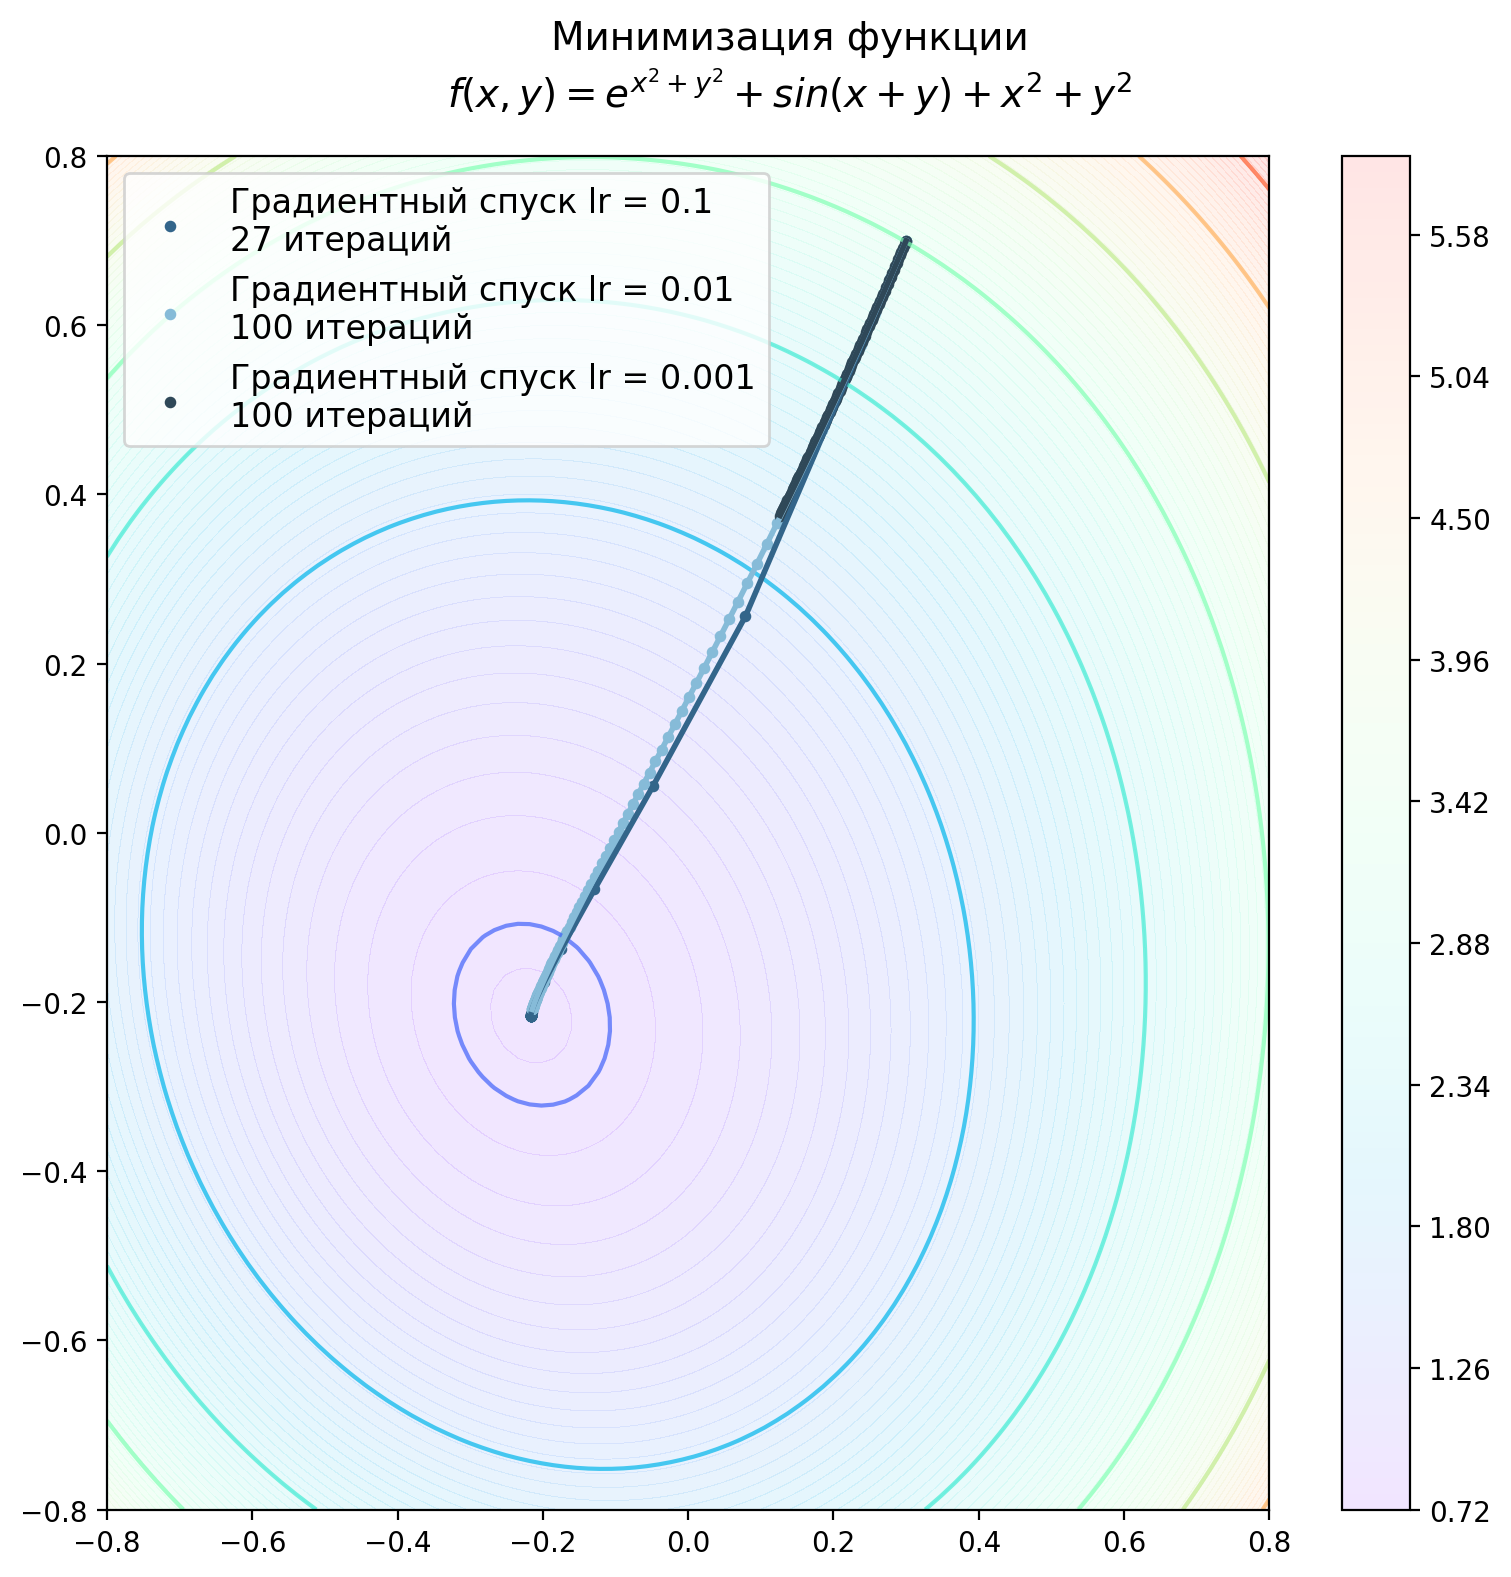

In [285]:
fig, ax = plt.subplots(figsize = (8, 8), dpi = 200)
im = visualize_func(f, (-0.8, 0.8), (-0.8, 0.8), ax)
plt.colorbar(im)
# ax.plot(history[:, 0], history[:, 1], color = '#F26419')
# ax.scatter(history[:, 0], history[:, 1], color = '#F26419', s = 10, label = f'Метод Ньютона\n{len(history)} итераций')
colors = ['#33658A', '#86BBD8', '#2F4858']
for c, lr in zip(colors, lr_values):
    h = history_gd[lr]
    ax.plot(h[:, 0], h[:, 1], color = c.lower(), linewidth = 2)
    ax.scatter(h[:, 0], h[:, 1], color = c.lower(), s = 10, label = f'Градиентный спуск lr = {lr}\n{len(h)} итераций')
fig.suptitle("Минимизация функции\n$f(x, y) = e^{x^2 + y^2} + sin(x + y) + x^2 + y^2$", fontsize = 14)
ax.legend(fontsize = 12)
fig.tight_layout()


### Метод сопряженных градиентов

In [25]:
def minimize(f: callable, 
             grad_f: callable,
             x0: np.ndarray, 
             Bk: callable, 
             phi_minimization: callable, 
             max_iter: int = int(1e3), 
             eps = 1e-6):
    """Минимизация методом сопряженных градиентов

    Args:
        f (tp.Callable): Минимизируемая функция: Rn -> R
        grad_f (tp.Callable): Градиент минимизируемой функции Rn -> Rn
        x0 (np.ndarray): Начальное приближение точки минимума
        Bk (tp.Callable): Метод для выбора константы Bk на k-ой итерации
        phi_minimization (tp.Callable, optional): Метод минимизации функции вдоль выбранного направления.
        max_iter (int, optional): Максимальное число итераций. Defaults to int(1e4).
        eps (_type_, optional): условие остановки на градиент. Defaults to 1e-6.
    """
    x = x0
    S = -grad_f(x0)
    history = [x0]
    while len(history) < max_iter and np.linalg.norm(grad_f(x)) > eps and np.isfinite(np.linalg.norm(x)):
        alpha_min = phi_minimization(lambda alpha: f(x + alpha * S))
        x_new = x + alpha_min * S
        Beta = Bk(rk = -grad_f(x_new), rk_prev = -grad_f(x), Sk = S)
        S = -grad_f(x_new) + Beta * S
        x = x_new
        history.append(x.copy())
    return x, np.array(history)


In [26]:
Fletcher_Rievs = lambda rk, rk_prev, Sk: np.linalg.norm(rk) ** 2 / np.linalg.norm(rk_prev) ** 2
Hestenes_Stiefel = lambda rk, rk_prev, Sk: np.dot(rk, rk - rk_prev) / np.dot(Sk, rk - rk_prev)
Polak_Ribier = lambda rk, rk_prev, Sk: np.dot(rk, rk - rk_prev) / np.linalg.norm(rk_prev) ** 2
Fletcher = lambda rk, rk_prev, Sk: np.linalg.norm(rk) ** 2 / np.dot(-Sk, rk_prev)
Liu_Stei = lambda rk, rk_prev, Sk: np.dot(rk, rk - rk_prev) / np.dot(-Sk, rk_prev)
Dai_Yuan = lambda rk, rk_prev, Sk: np.linalg.norm(rk) ** 2 / np.dot(Sk, rk - rk_prev)
Hager_Zhang = lambda rk, rk_prev, Sk: np.dot(rk - rk_prev - 2 * Sk * (np.linalg.norm(rk - rk_prev) ** 2) / np.dot(Sk, rk - rk_prev), rk / np.dot(Sk, rk - rk_prev))

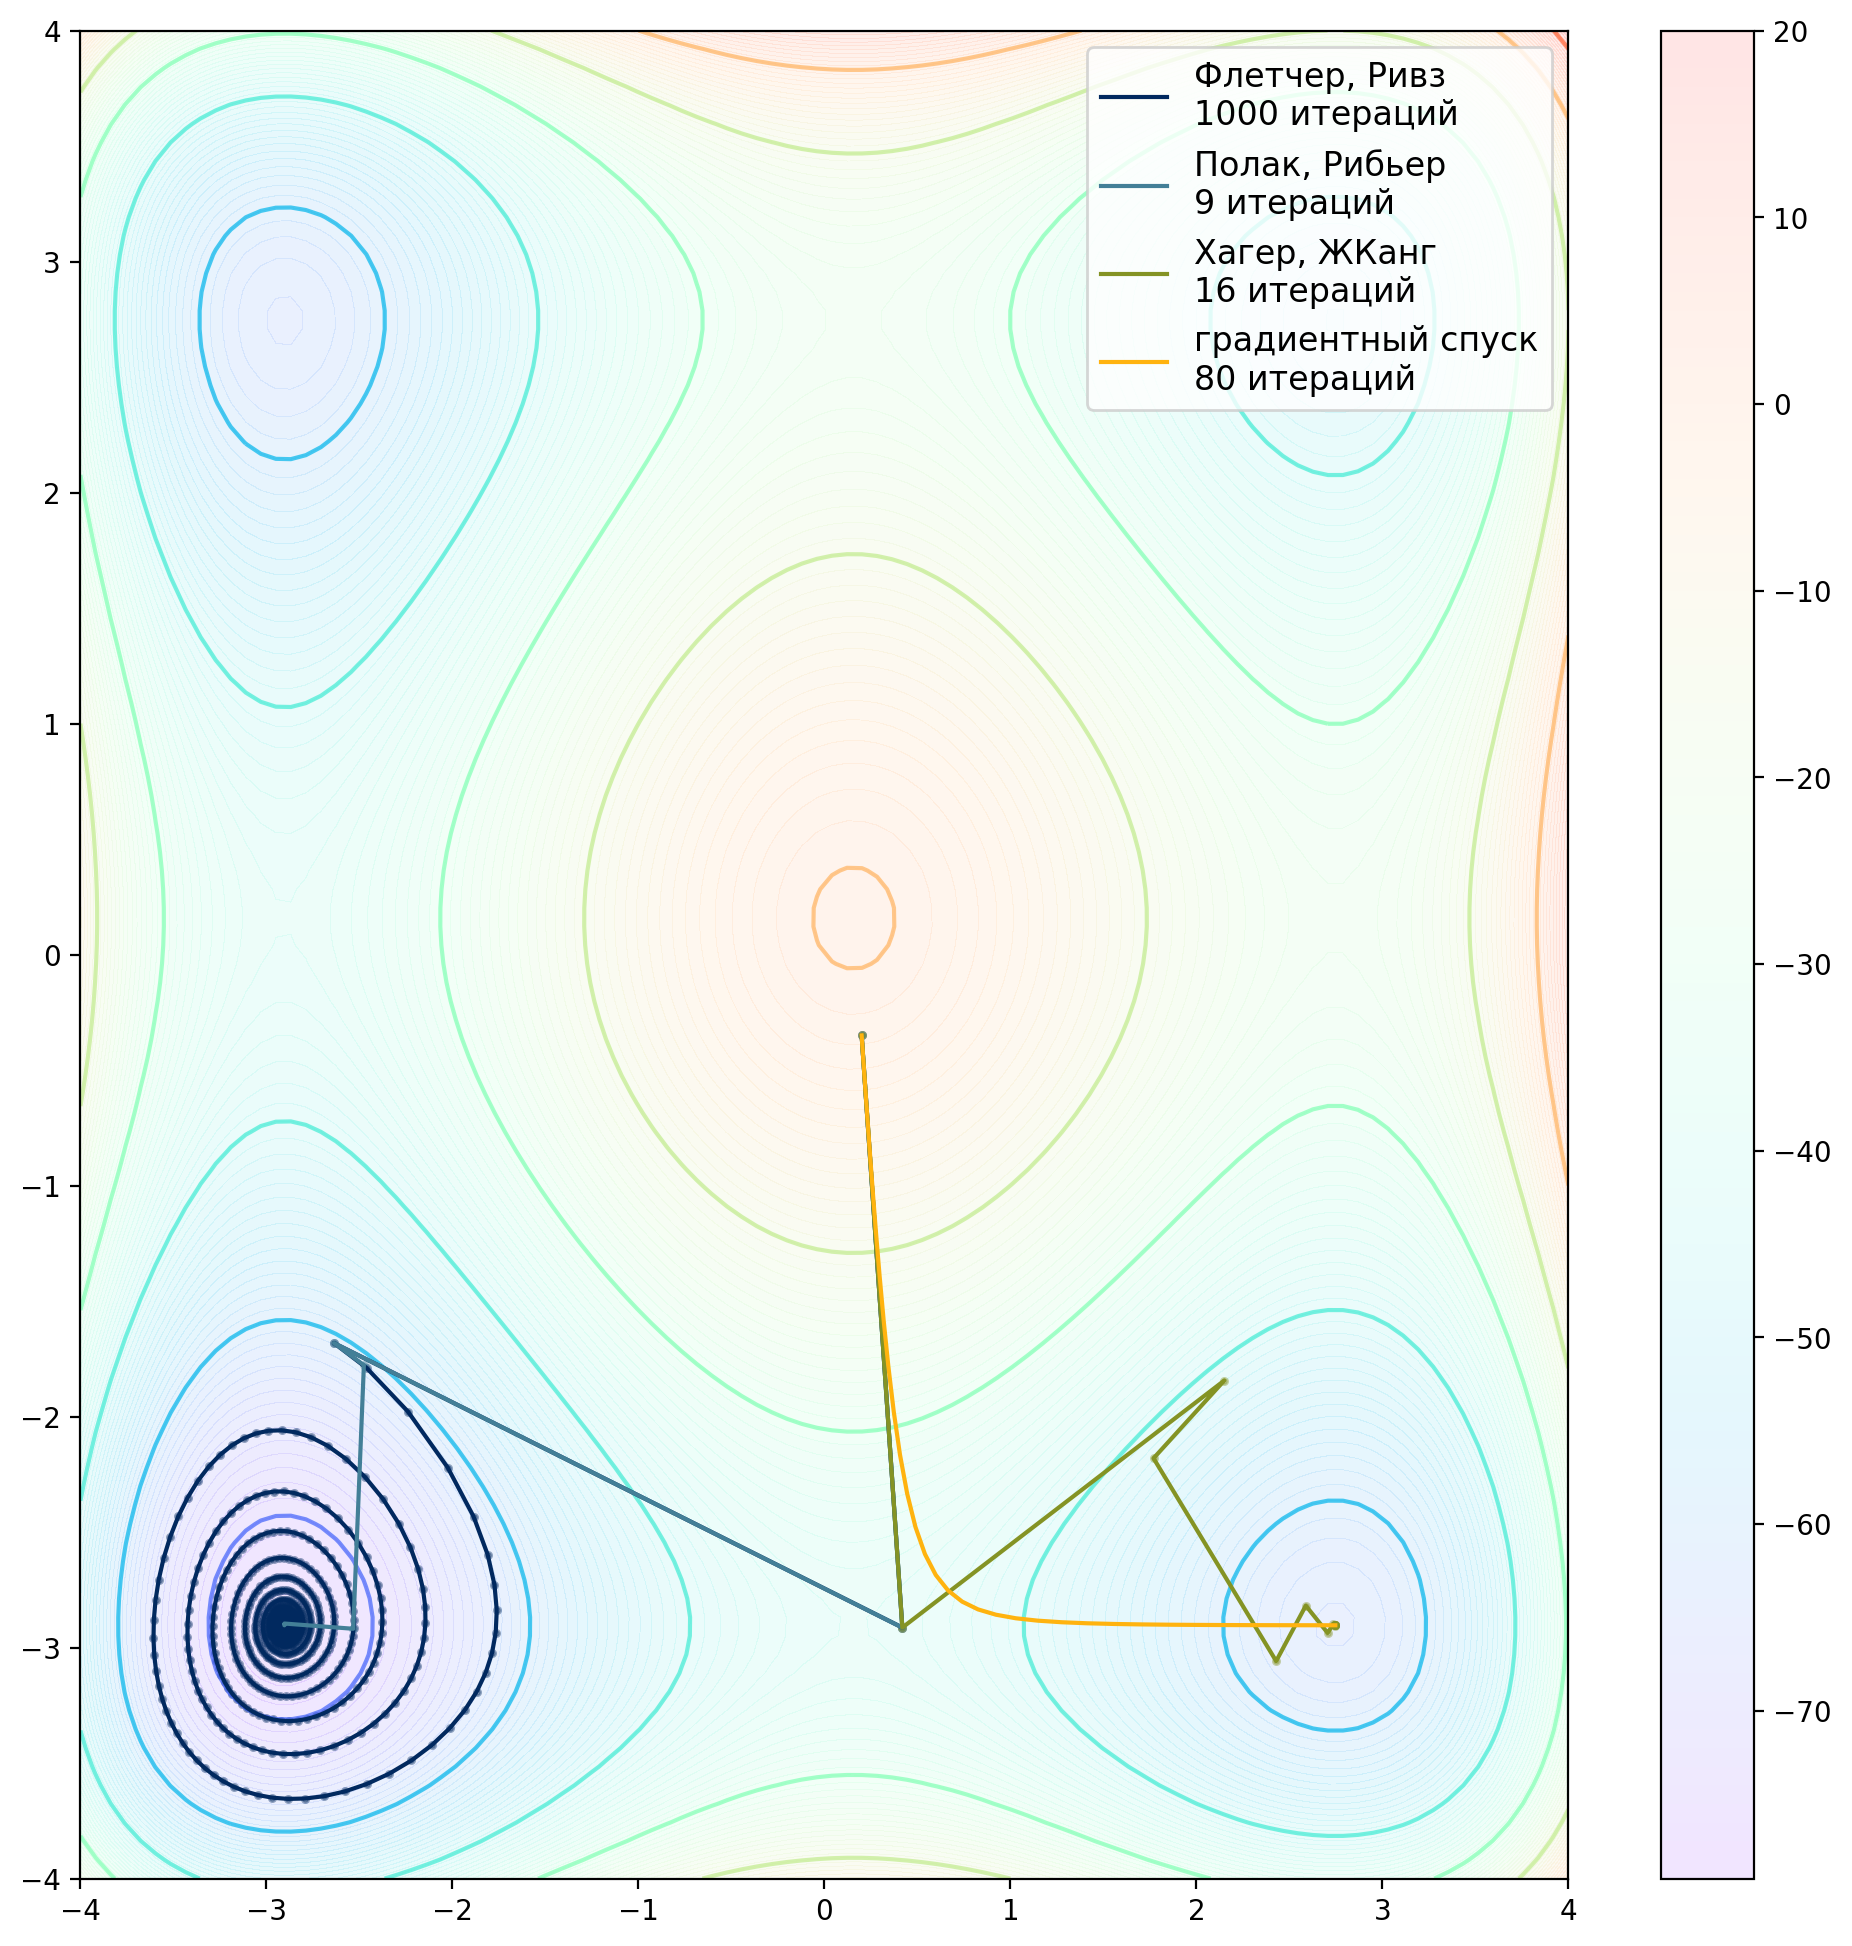

In [98]:
def f(x: np.ndarray):
    return 0.5 * np.sum(np.power(x, 4) - 16 * np.power(x, 2) + 5 * x, axis = 0)
def grad_f(x: np.ndarray):
    return 2 * np.power(x, 3) - 16 * x + 2.5 
phi_minimization_method = lambda func: opt.minimize_scalar(func).x

Bk_callable = [Fletcher_Rievs, Polak_Ribier, Hager_Zhang]
Bk_name = [ 'Флетчер, Ривз', 'Полак, Рибьер', 'Хагер, ЖКанг']

fig, ax = plt.subplots(figsize = (12, 12), dpi = 200)
im = visualize_func(f, (-4, 4), (-4, 4), ax)
plt.colorbar(im)
x_0 = np.array([0.2, -0.35])
colors = ['#01295F', '#437F97', '#849324', '#FFB30F']
_, gd_his = gradient_descent(grad_f, 0.01, x_0)
for bk, name, c in zip(Bk_callable, Bk_name, colors):
    res, his = minimize(f, grad_f, x_0, bk, phi_minimization_method)
    ax.scatter(his[:, 0], his[:, 1], color = c, s = 5, alpha = 0.4)
    ax.plot(his[:, 0], his[:, 1], color = c,  label = f'{name}\n{len(his)} итераций')

ax.plot(gd_his[:, 0], gd_his[:, 1], label = f'градиентный спуск\n{len(gd_his)} итераций', color = colors[-1])
ax.legend(fontsize = 12)
    

### SGD

In [8]:
def sgd(grad_f: callable,
        lr: float,
        x_0: np.ndarray,
        batch_size: int,
        max_iter: int = 1000,
        eps: float = 1e-6) -> tuple:
    """Стохастический градиентный спуск

    Args:
        grad_f (callable): градиент минимизируемой функции
        lr (float): величина шага
        x_0 (np.ndarray): начальная точка
        batch_size (int): размер батча
        max_iter (int): максимальное число итераций
        eps (float): для условия остановки

    Returns:
        tuple: резултат, история
    """
    x = x_0.copy()
    history = [x.copy()]
    grad = grad_f(x)
    while np.linalg.norm(grad) > eps and len(history) < max_iter:
        #выбираем индексы по которым будет зануляться градиент
        indecies = np.random.choice(len(x), len(x) - batch_size) 
        d = grad.copy()
        d[indecies] = 0
        x -= lr * d
        grad = grad_f(x) 
        history.append(x.copy())
    return x, np.array(history)


In [9]:
f = lambda x: np.exp(x[0]**2 + x[1]**2) + np.sin(x[0] + x[1]) + x[0]**2 + x[1]**2
grad_f = lambda x: np.array([2*x[0]*np.exp(x[0]**2 + x[1]**2) + np.cos(x[0] + x[1]) + 2*x[0], 
                       2*x[1]*np.exp(x[0]**2 + x[1]**2) + np.cos(x[0] + x[1]) + 2*x[1]])

lr_values = [1e-1, 1e-2, 1e-3]
x_0 = np.array([0.3, 0.7])
history_sgd = {lr: sgd(grad_f, lr, x_0, 1)[1] for lr in lr_values}


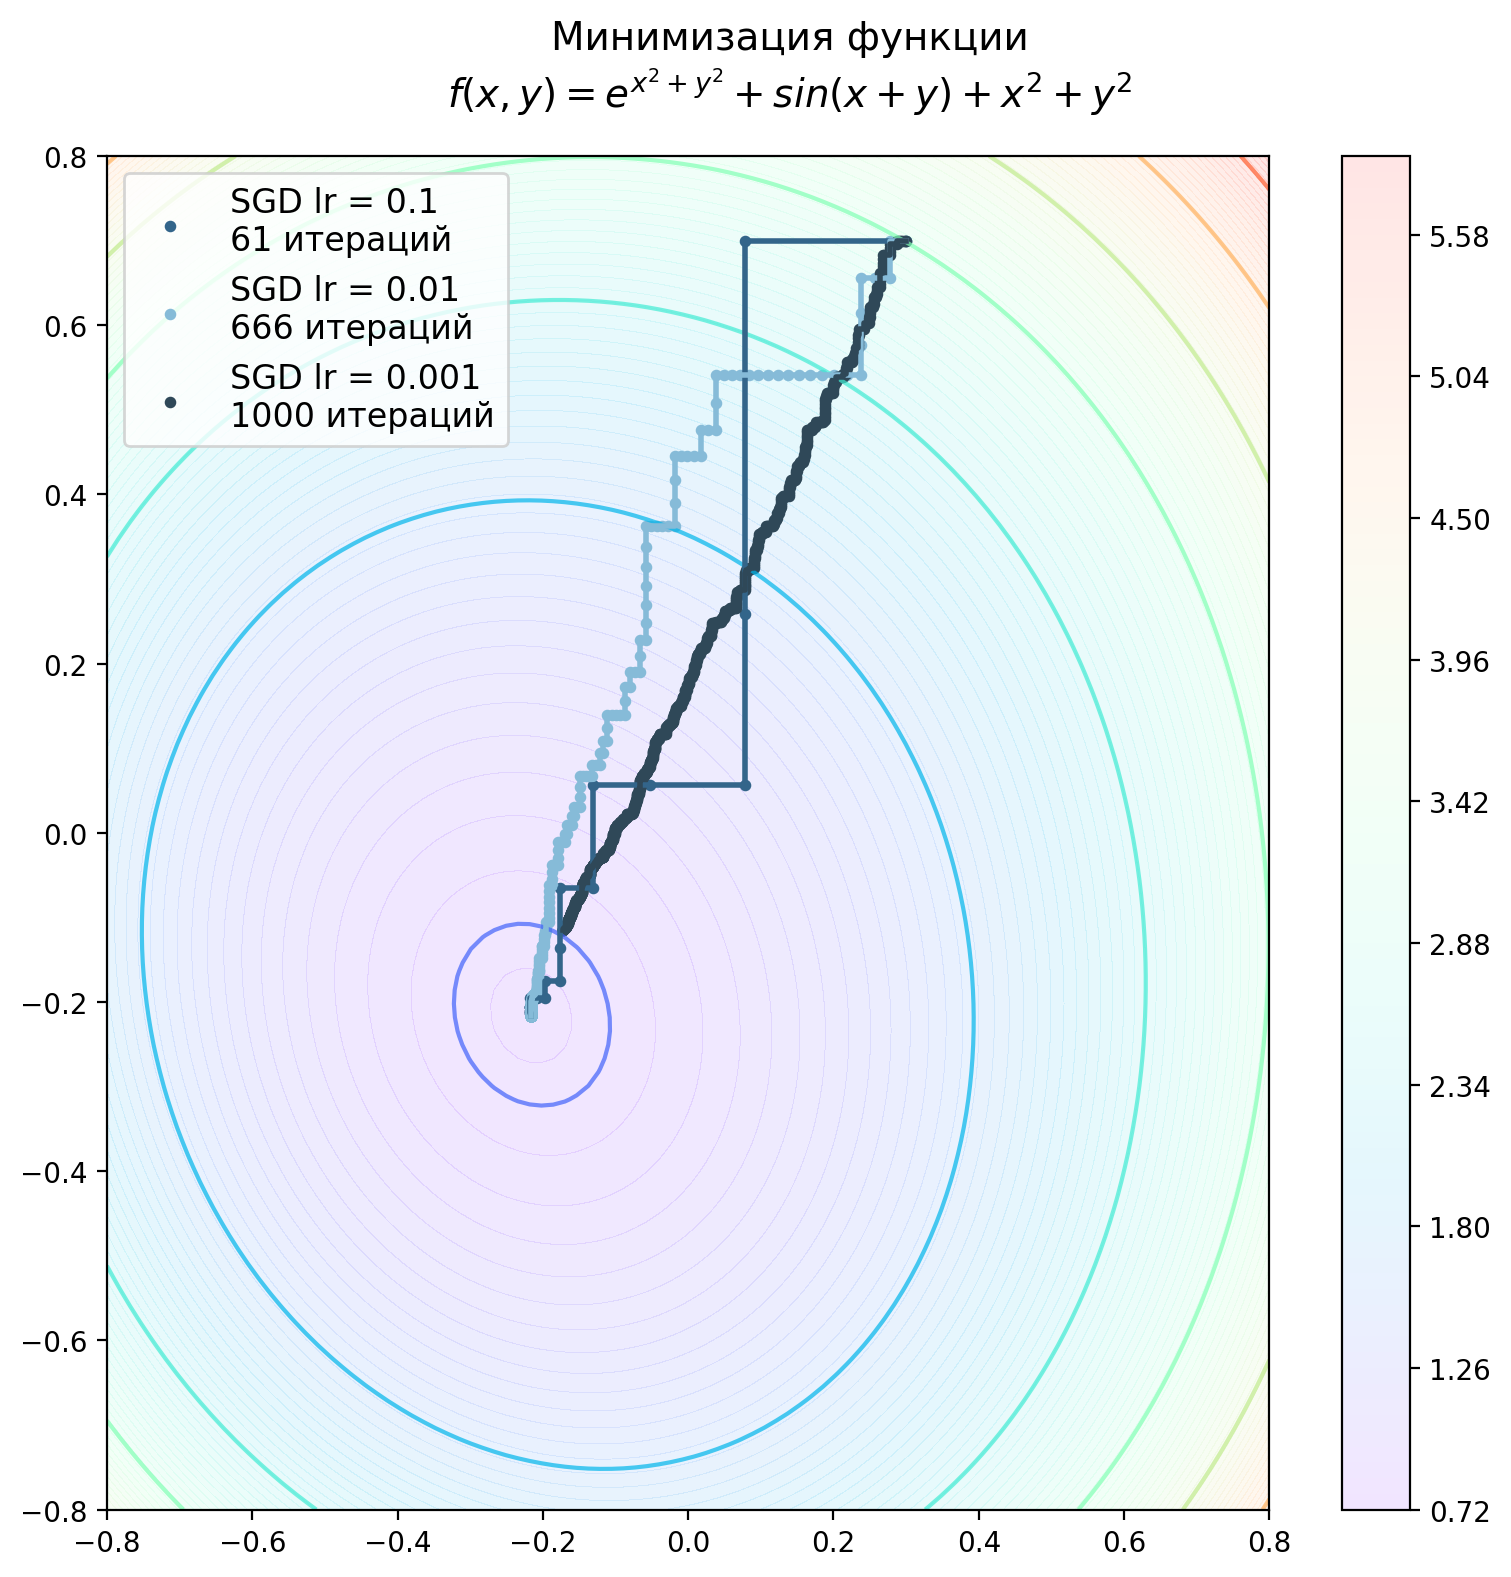

In [12]:
fig, ax = plt.subplots(figsize = (8, 8), dpi = 200)
im = visualize_func(f, (-0.8, 0.8), (-0.8, 0.8), ax)
plt.colorbar(im)
# ax.plot(history[:, 0], history[:, 1], color = '#F26419')
# ax.scatter(history[:, 0], history[:, 1], color = '#F26419', s = 10, label = f'Метод Ньютона\n{len(history)} итераций')
colors = ['#33658A', '#86BBD8', '#2F4858']
for c, lr in zip(colors, lr_values):
    h = history_sgd[lr]
    ax.plot(h[:, 0], h[:, 1], color = c.lower(), linewidth = 2)
    ax.scatter(h[:, 0], h[:, 1], color = c.lower(), s = 10, label = f'SGD lr = {lr}\n{len(h)} итераций')
fig.suptitle("Минимизация функции\n$f(x, y) = e^{x^2 + y^2} + sin(x + y) + x^2 + y^2$", fontsize = 14)
ax.legend(fontsize = 12)
fig.tight_layout()

### Momentum

In [13]:
import torch

In [129]:
f = lambda x: torch.exp(x[0] + x[1]) + torch.sin(x[0] * 2 + x[1] * 1) + x[0]**2 + x[1]**2 + 1.1 *  torch.cos(x[0] * 3 + x[1] * 2)
f_numpy = lambda x: np.exp(x[0] + x[1]) + np.sin(x[0] * 2 + x[1] * 1) + x[0]**2 + x[1]**2 + 1.1*  np.cos(x[0] * 3 + x[1] * 2)

In [130]:
x_0 = [1.5, 1.4]
x = torch.tensor(x_0, requires_grad=True)  
optimizer = torch.optim.SGD([x], lr=0.001, momentum=0.9)

history = [np.array(x_0)]
optimizer.zero_grad() 
loss = f(x) 
loss.backward() 
optimizer.step() 
history.append(x.detach().numpy().copy()) 



n_iter = 1000


while np.linalg.norm(history[-1] - history[-2]) > 1e-6:
    optimizer.zero_grad() 
    loss = f(x) 
    loss.backward() 
    optimizer.step() 
    history.append(x.detach().numpy().copy())  

history = np.array(history)

In [131]:
x_0 = [1.5, 1.4]
x = torch.tensor(x_0, requires_grad=True)  
optimizer = torch.optim.SGD([x], lr=0.001, momentum = 0)

history_sgd = [np.array(x_0)]
optimizer.zero_grad() 
loss = f(x) 
loss.backward() 
optimizer.step() 
history_sgd.append(x.detach().numpy().copy()) 



n_iter = 1000


while np.linalg.norm(history_sgd[-1] - history_sgd[-2]) > 1e-6:
    optimizer.zero_grad() 
    loss = f(x) 
    loss.backward() 
    optimizer.step() 
    history_sgd.append(x.detach().numpy().copy())  

history_sgd = np.array(history_sgd)

In [133]:
x_0 = [1.5, 1.4]
x = torch.tensor(x_0, requires_grad=True)  
optimizer = torch.optim.SGD([x], lr=0.001, momentum = 0.9, nesterov=True)

nesterov = [np.array(x_0)]
optimizer.zero_grad() 
loss = f(x) 
loss.backward() 
optimizer.step() 
nesterov.append(x.detach().numpy().copy()) 



n_iter = 1000


while np.linalg.norm(nesterov[-1] - nesterov[-2]) > 1e-6:
    optimizer.zero_grad() 
    loss = f(x) 
    loss.backward() 
    optimizer.step() 
    nesterov.append(x.detach().numpy().copy())  

nesterov = np.array(nesterov)

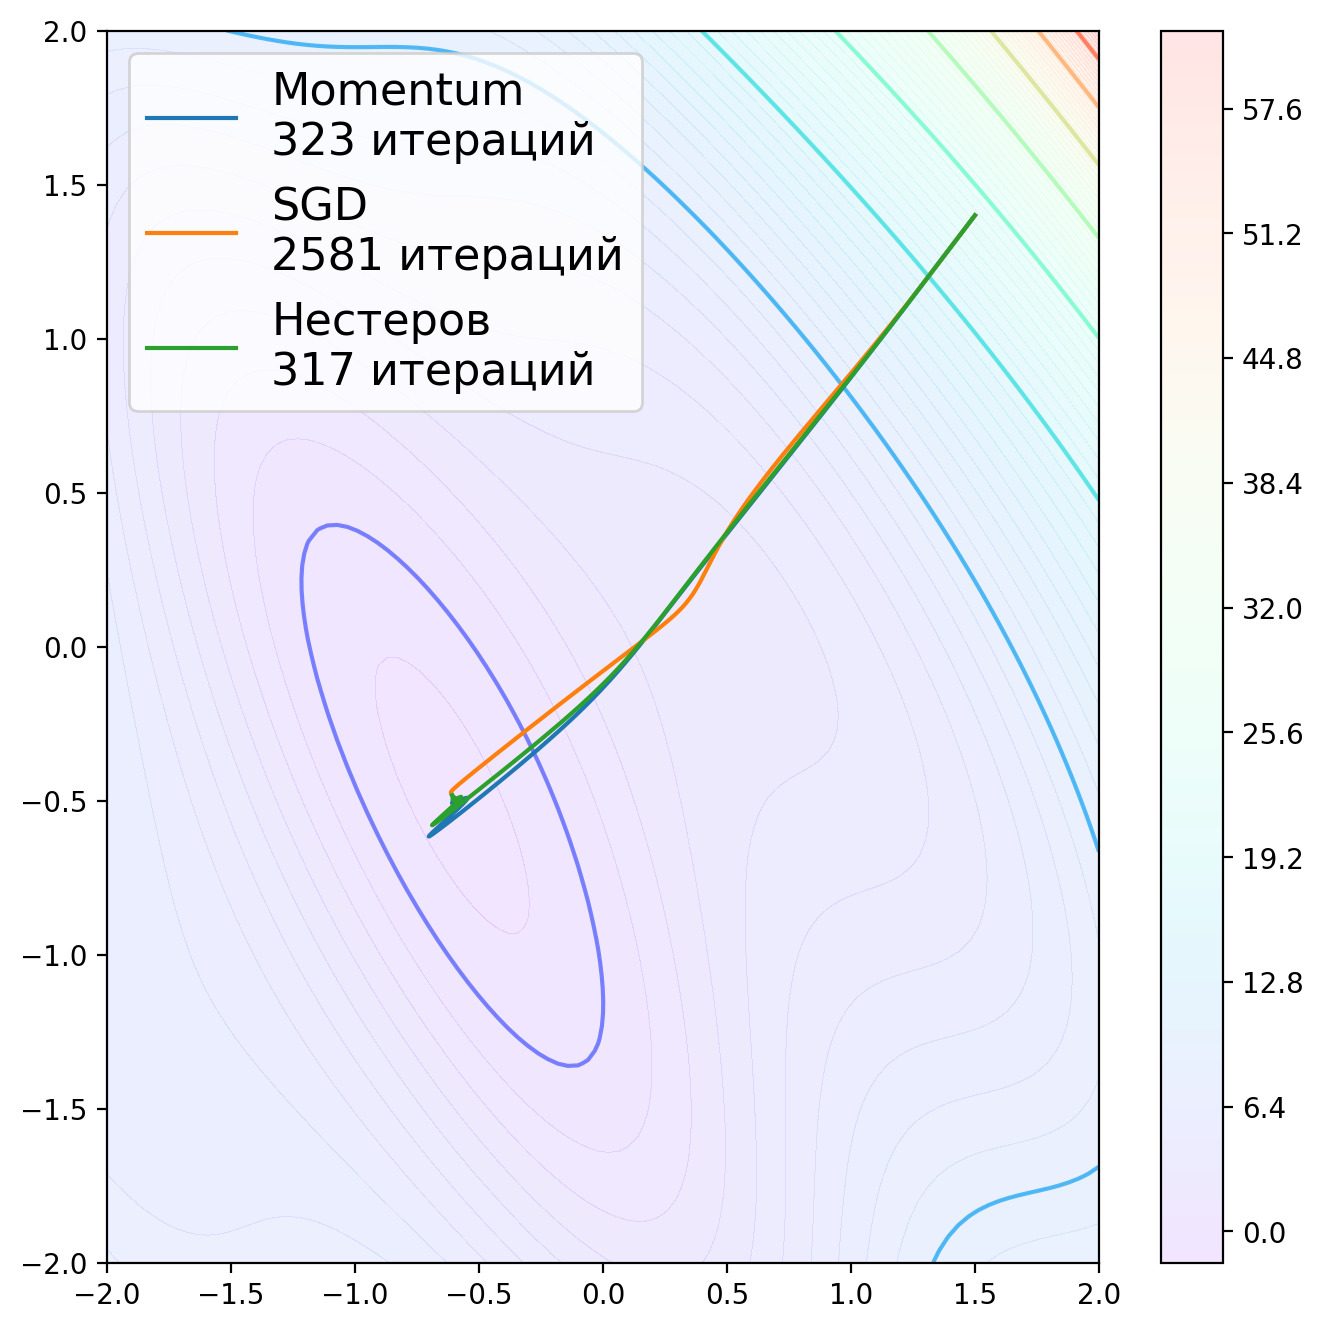

In [135]:
fig, ax = plt.subplots(figsize = (8, 8), dpi = 200)
im = visualize_func(f_numpy, (-2, 2), (-2, 2), ax)

ax.plot(history[:, 0], history[:, 1], label = f'Momentum\n{len(history)} итераций')
ax.plot(history_sgd[:, 0], history_sgd[:, 1], label = f'SGD\n{len(history_sgd)} итераций')
ax.plot(nesterov[:, 0], nesterov[:, 1], label = f'Нестеров\n{len(nesterov)} итераций')


plt.colorbar(im)
ax.legend(fontsize = 16)

In [41]:
t = np.linspace(0, 20, 1000)
sig = np.sin(2 * np.pi * 0.5 * t) + np.random.random(t.shape) / 4
filtered = []
mean = 0
beta = 0.1
for s in sig:
    mean = (1 - beta) * mean + beta * s
    filtered.append(mean)

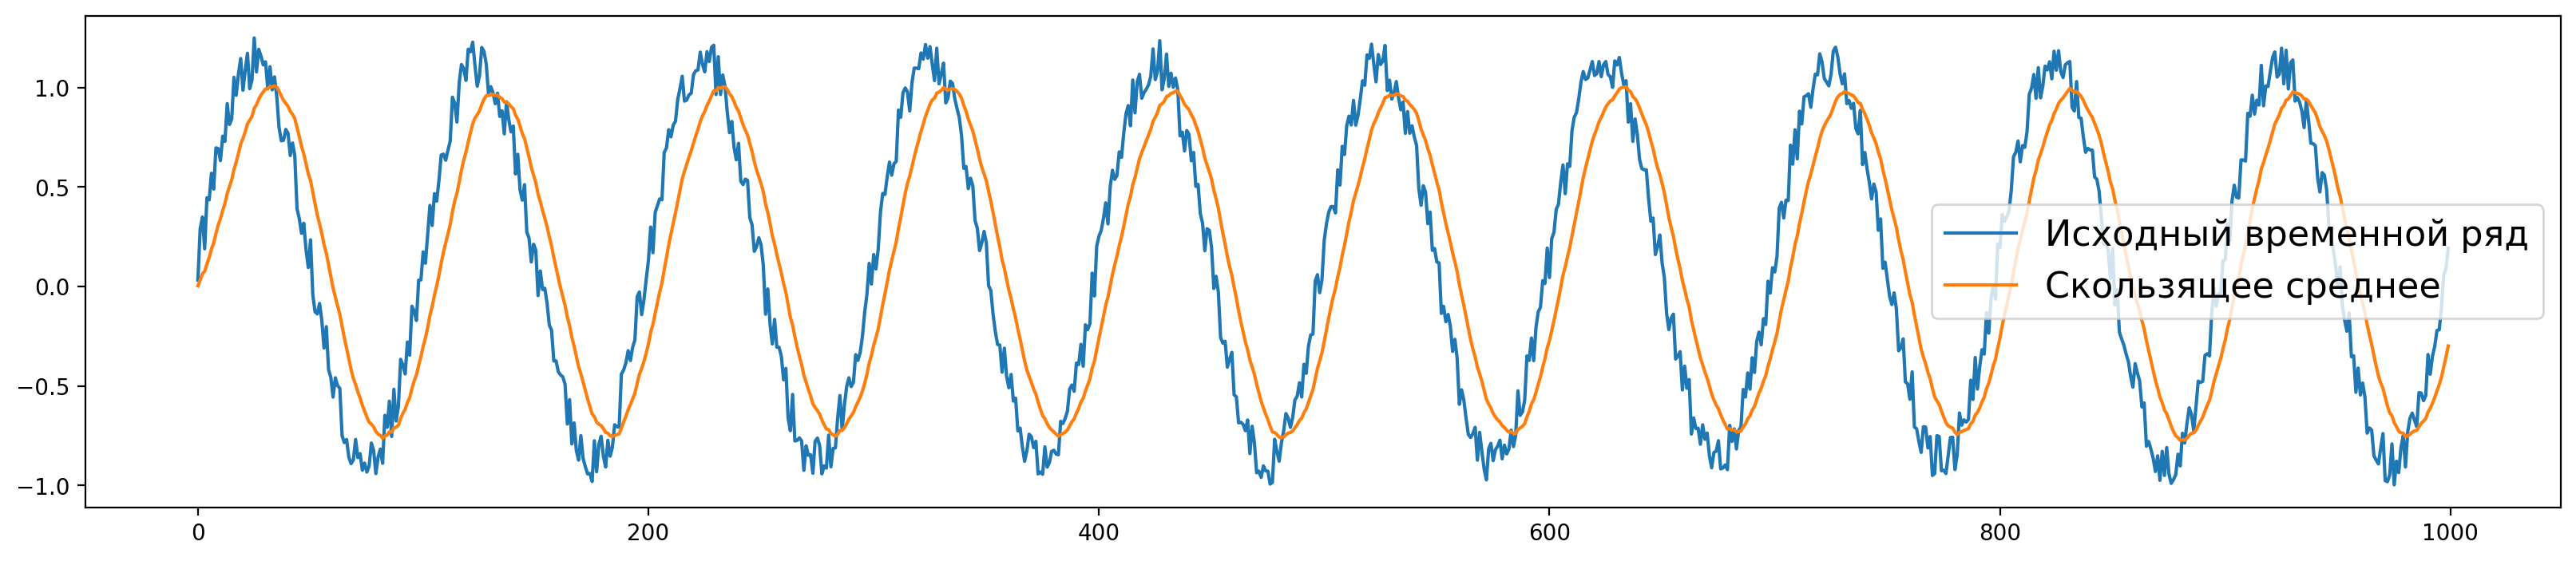

In [42]:
plt.figure(figsize = (20, 4), dpi = 200)
plt.plot(sig, label = 'Исходный временной ряд')
plt.plot(filtered, label = 'Скользящее среднее')
plt.legend(fontsize = 16)

### RMS prop

In [137]:
x_0 = [1.5, 1.4]
x = torch.tensor(x_0, requires_grad=True)  
optimizer = torch.optim.RMSprop([x])

rms = [np.array(x_0)]
optimizer.zero_grad() 
loss = f(x) 
loss.backward() 
optimizer.step() 
rms.append(x.detach().numpy().copy()) 



n_iter = 1000


while np.linalg.norm(rms[-1] - rms[-2]) > 1e-6:
    optimizer.zero_grad() 
    loss = f(x) 
    loss.backward() 
    optimizer.step() 
    rms.append(x.detach().numpy().copy())  

rms = np.array(rms)

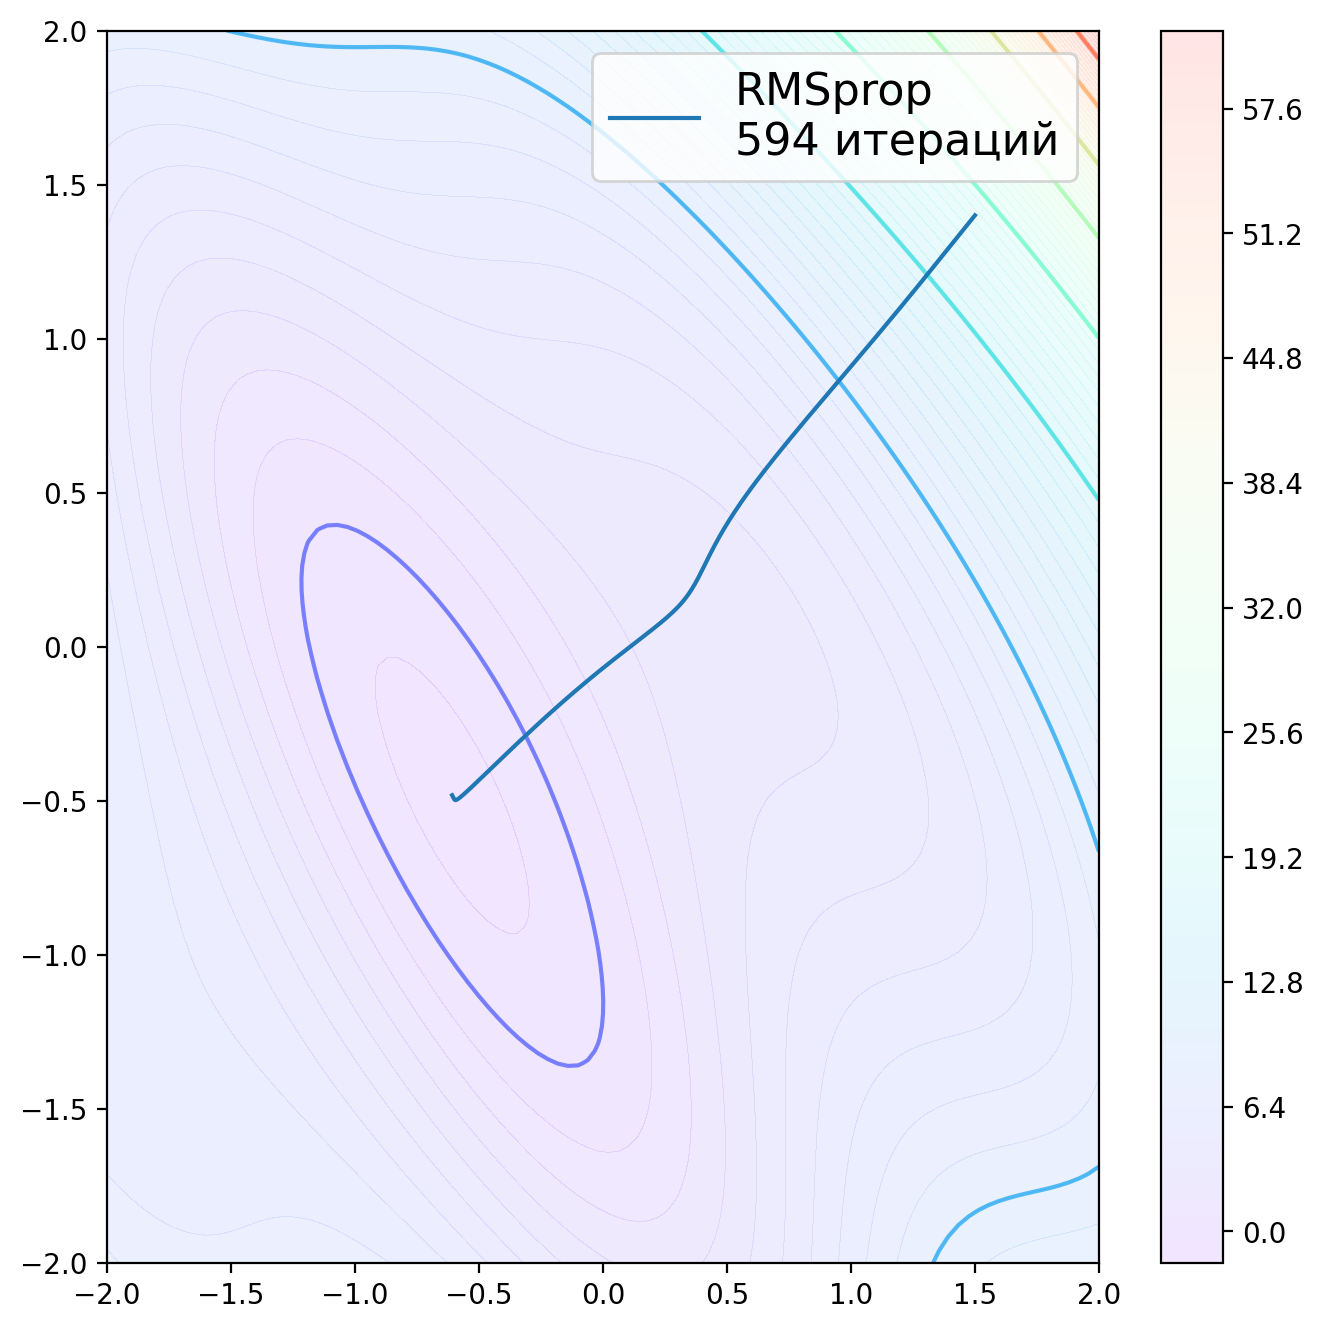

In [138]:
fig, ax = plt.subplots(figsize = (8, 8), dpi = 200)
im = visualize_func(f_numpy, (-2, 2), (-2, 2), ax)

ax.plot(rms[:, 0], rms[:, 1], label = f'RMSprop\n{len(rms)} итераций')



plt.colorbar(im)
ax.legend(fontsize = 16)

### adam

In [143]:
x_0 = [1.5, 1.4]
x = torch.tensor(x_0, requires_grad=True)  
optimizer = torch.optim.Adam([x], lr = 1e-2)

adam = [np.array(x_0)]
optimizer.zero_grad() 
loss = f(x) 
loss.backward() 
optimizer.step() 
adam.append(x.detach().numpy().copy()) 



n_iter = 1000


while np.linalg.norm(adam[-1] - adam[-2]) > 1e-6:
    optimizer.zero_grad() 
    loss = f(x) 
    loss.backward() 
    optimizer.step() 
    adam.append(x.detach().numpy().copy())  

adam = np.array(adam)

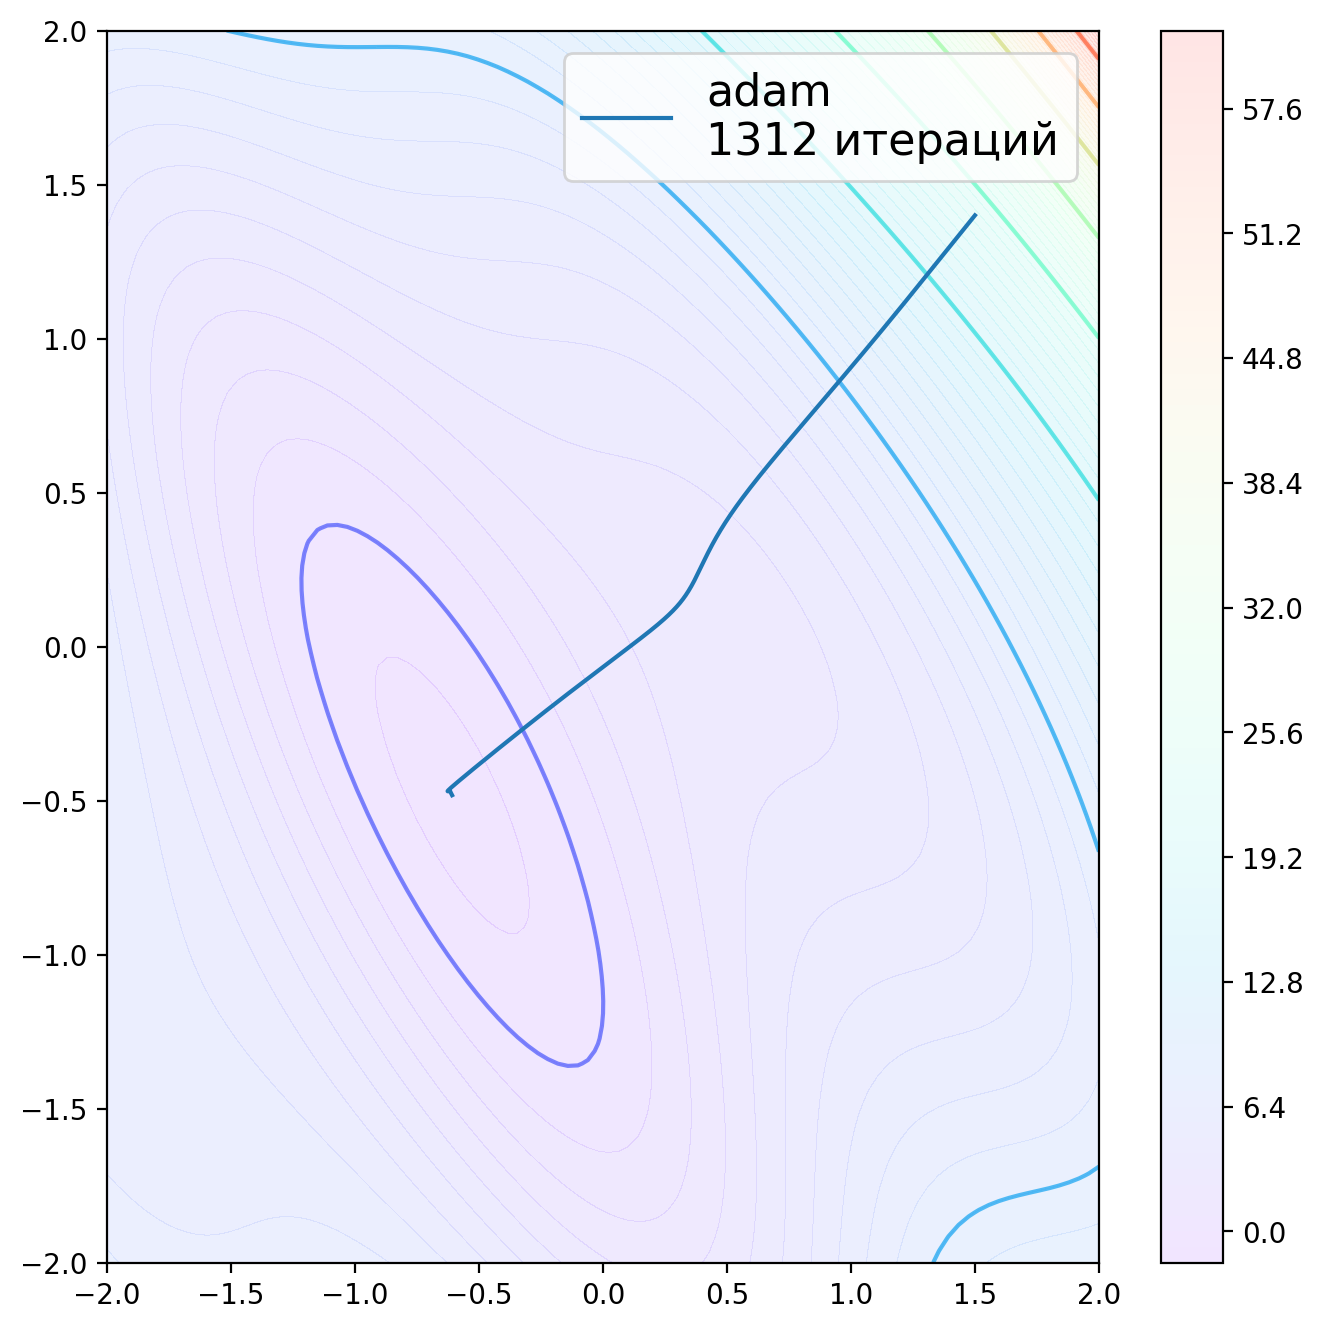

In [144]:
fig, ax = plt.subplots(figsize = (8, 8), dpi = 200)
im = visualize_func(f_numpy, (-2, 2), (-2, 2), ax)

ax.plot(adam[:, 0], adam[:, 1], label = f'adam\n{len(adam)} итераций')



plt.colorbar(im)
ax.legend(fontsize = 16)

### somwe

<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_98412/1915573283.py:28: SyntaxWarning: invalid escape sequence '\p'
  ax1.plot(line[:, 0], line[:, 1], f(line[:, 0], line[:, 1]), color='r', linewidth=3, label='$\phi(t) = f(x_k + t \cdot S_{k})$')


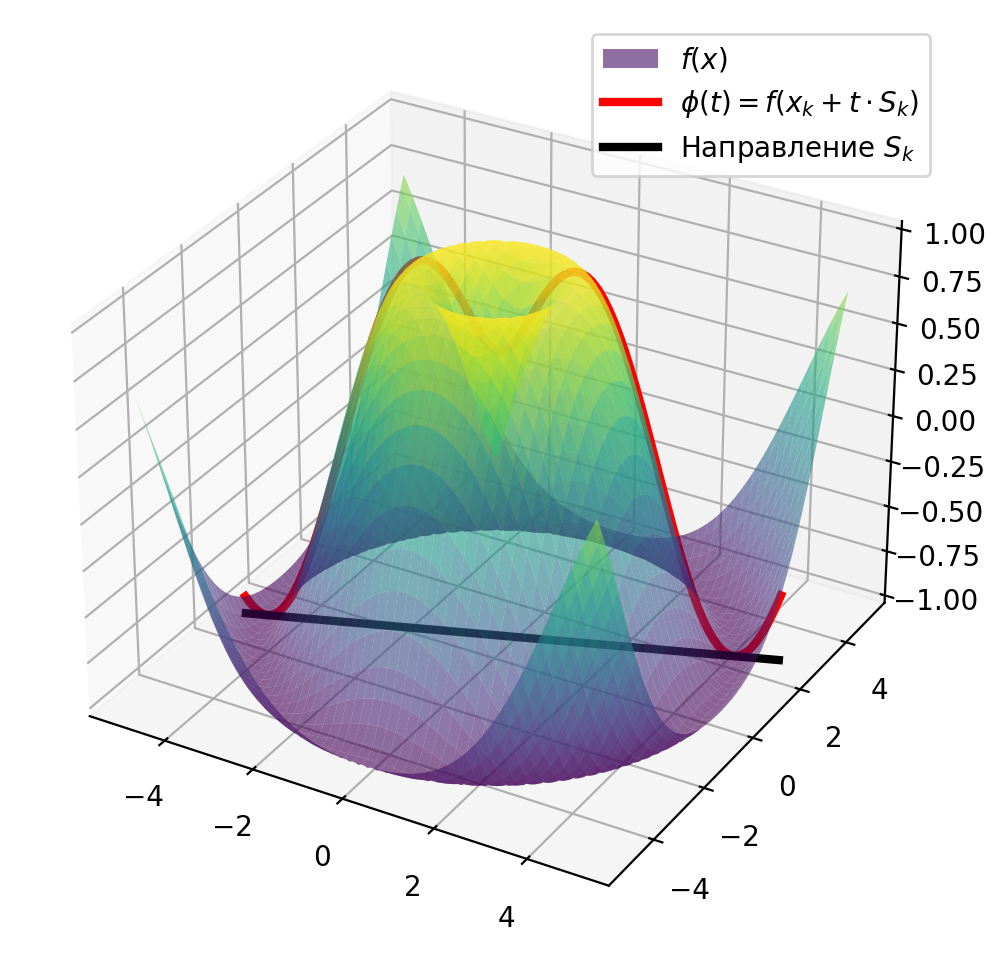

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(X, Y):
    return np.sin(np.sqrt(X**2 + Y**2))


x0 = np.array([1, 1])
S = np.array([2, 0.75])
t_vals = np.linspace(-3, 2, 100)
line = x0 + t_vals[:, np.newaxis] * S


phi = f(line[:, 0], line[:, 1])

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)


fig = plt.figure(figsize=(14, 6), dpi = 200)


ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, label = '$f(x)$')
ax1.plot(line[:, 0], line[:, 1], f(line[:, 0], line[:, 1]), color='r', linewidth=3, label='$\phi(t) = f(x_k + t \cdot S_{k})$')

ax1.plot(line[:, 0], line[:, 1], np.ones_like(line[:, 0]) * (-1), color = 'black', linewidth = 3, label = 'Направление $S_{k}$')
ax1.legend()